In [231]:
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(suppress=True)

import seaborn as sns
%matplotlib inline

In [232]:
files = glob.glob('./dat/*')

len(files)

28261

In [7]:
file = files[100]

with open(file, 'r') as fp:
    match = json.load(fp)

In [8]:
match.keys()

dict_keys(['gameId', 'platformId', 'gameCreation', 'gameDuration', 'queueId', 'mapId', 'seasonId', 'gameVersion', 'gameMode', 'gameType', 'teams', 'participants', 'participantIdentities'])

In [12]:
match['participants'][0].keys()

dict_keys(['participantId', 'teamId', 'championId', 'spell1Id', 'spell2Id', 'highestAchievedSeasonTier', 'stats', 'timeline'])

In [287]:
match['participants'][0]['timeline']

{'participantId': 1,
 'creepsPerMinDeltas': {'10-20': 7.199999999999999, '0-10': 7.7},
 'xpPerMinDeltas': {'10-20': 525.8, '0-10': 308.6},
 'goldPerMinDeltas': {'10-20': 405.6, '0-10': 253.5},
 'csDiffPerMinDeltas': {'10-20': -0.6000000000000001,
  '0-10': -1.0999999999999996},
 'xpDiffPerMinDeltas': {'10-20': 27.599999999999966,
  '0-10': -34.09999999999998},
 'damageTakenPerMinDeltas': {'10-20': 378.4, '0-10': 184.6},
 'damageTakenDiffPerMinDeltas': {'10-20': 161.75000000000003,
  '0-10': 19.30000000000001},
 'role': 'DUO_CARRY',
 'lane': 'BOTTOM'}

In [288]:
for i in range(10):
#    print(i, match['participants'][i]['timeline'])
    print(i, match['participants'][i]['timeline']['xpPerMinDeltas'])
    

0 {'10-20': 525.8, '0-10': 308.6}
1 {'10-20': 488.6, '0-10': 376}
2 {'10-20': 718.4, '0-10': 454.8}
3 {'10-20': 426.9, '0-10': 300.9}
4 {'10-20': 326.9, '0-10': 277.4}
5 {'10-20': 427.70000000000005, '0-10': 333}
6 {'10-20': 500.79999999999995, '0-10': 382.8}
7 {'10-20': 487.90000000000003, '0-10': 453.3}
8 {'10-20': 477.5, '0-10': 299.9}
9 {'10-20': 369.8, '0-10': 321.20000000000005}


In [289]:
duration_dict = {
    0: ['0-10'],
    1: ['0-10','10-20'],
    2: ['0-10','10-20','20-30']
    }

def get_gold_per_min(match, team, duration):
    if team == 0:
        return [[match['participants'][i]['timeline']['goldPerMinDeltas'][time_range]
                for time_range in duration_dict[duration]] for i in range(5)]
    if team == 1:
        return [[match['participants'][i]['timeline']['goldPerMinDeltas'][time_range]
                for time_range in duration_dict[duration]] for i in range(5,10)]

def get_gold_totals(match, duration):    
    team_0_data = get_gold_per_min(match, 0, duration)
    team_1_data = get_gold_per_min(match, 1, duration)

    team_0_data = np.sum(np.array(team_0_data)*10,axis=0)
    team_1_data = np.sum(np.array(team_1_data)*10,axis=0)

    team_difference = team_0_data - team_1_data
    
    return np.concatenate((team_0_data, team_1_data, team_difference))

def get_xp_per_min(match, team, duration):

    if team == 0:
        return [[match['participants'][i]['timeline']['xpPerMinDeltas'][time_range]
                for time_range in duration_dict[duration]] for i in range(5)]
    if team == 1:
        return [[match['participants'][i]['timeline']['xpPerMinDeltas'][time_range]
                for time_range in duration_dict[duration]] for i in range(5,10)]

def get_xp_totals(match, duration):    
    team_0_data = get_xp_per_min(match, 0, duration)
    team_1_data = get_xp_per_min(match, 1, duration)

    team_0_data = np.sum(np.array(team_0_data)*10,axis=0)
    team_1_data = np.sum(np.array(team_1_data)*10,axis=0)

    team_difference = team_0_data - team_1_data
    
    return np.concatenate((team_0_data, team_1_data, team_difference))

In [290]:
def seconds_to_duration_category(seconds):
    """
    returns duration
    0: ['0-10'],
    1: ['0-10','10-20'],
    2: ['0-10','10-20','20-30']
    """
    mins = seconds/60
    return int(mins/10)-1

In [327]:
winners = []
file_names = []
duration = 1
gold = []
xp = []

for i, file in enumerate(files):
#     if i == 5000:
#         break
    if i % 100 == 0:
        print(i)
    with open(file, 'r') as fp:
        match = json.load(fp)
        if match['seasonId'] == 11:
            seconds = match['gameDuration']
            if seconds_to_duration_category(seconds) >= duration:
                try:
                    cur_gold = get_gold_totals(match, duration)
                    gold.append(cur_gold)
                    cur_xp = get_xp_totals(match, duration)
                    xp.append(cur_xp)
                    winner = (match['teams'][0]['win'] == 'Fail')*1
                    winners.append(winner)
                except:
                    print(i)

0
100
200
300
400
500
600
700
799
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2031
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
3907
3955
4000
4100
4148
4200
4299
4300
4307
4321
4346
4400
4500
4561
4600
4645
4695
4700
4800
4840
4900
5000
5100
5200
5300
5400
5500
5600
5618
5643
5661
5679
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6728
6775
6800
6885
6900
6905
7000
7100
7200
7300
7400
7500
7600
7700
7720
7800
7900
8000
8042
8063
8100
8200
8300
8400
8500
8581
8600
8700
8740
8800
8831
8900
8976
9000
9032
9100
9200
9202
9214
9256
9300
9400
9500
9600
9700
9780
9797
9800
9900
10000
10069
10085
10100
10143
10176
10200
10300
10325
10400
10500
10600
10700
10800
10878
10900
10914
10980
11000
11100
11200
11230
11295
11300
11352
11366
11400
11486
11500
11513
11600
11626
11665
11674
11700
11800
11887
11900
11932
11945
11984
12000
12100
12200
12300
12395
12400
12423
12434
12500
12600
12700
12775
12791
12800
12810
12831
1

In [346]:
[print(len(x)) for x in [winners, gold, xp]]

21831
21831
21831


[None, None, None]

In [347]:
gold_array = np.array(gold)
print(gold_array.shape)

xp_array = np.array(xp)
print(xp_array.shape)

winners = np.array(winners)
winners = winners.reshape((winners.shape[0],1))
print(winners.shape)

(21831, 6)
(21831, 6)
(21831, 1)


In [332]:
labels = []
for team in ['0','1','d']:
    for d in duration_dict[duration]:
        labels.append('t' + team + '_' + str(d))
labels

['t0_0-10', 't0_10-20', 't1_0-10', 't1_10-20', 'td_0-10', 'td_10-20']

In [333]:
full_labels = []
for variable in ['gold','xp']:
    for label in labels:
        full_labels.append(variable + '_' + label)

In [334]:
full_labels.append('winner')
full_labels

['gold_t0_0-10',
 'gold_t0_10-20',
 'gold_t1_0-10',
 'gold_t1_10-20',
 'gold_td_0-10',
 'gold_td_10-20',
 'xp_t0_0-10',
 'xp_t0_10-20',
 'xp_t1_0-10',
 'xp_t1_10-20',
 'xp_td_0-10',
 'xp_td_10-20',
 'winner']

In [335]:
df = pd.DataFrame(np.concatenate((gold_array,xp_array, winners),axis=1),columns=full_labels)

In [336]:
df

,gold_t0_0-10,gold_t0_10-20,gold_t1_0-10,gold_t1_10-20,gold_td_0-10,gold_td_10-20,xp_t0_0-10,xp_t0_10-20,xp_t1_0-10,xp_t1_10-20,xp_td_0-10,xp_td_10-20,winner
0,23577.0,29136.0,25354.0,31001.0,-1777.0,-1865.0,33197.0,55216.0,36060.0,59115.0,-2863.0,-3899.0,1.0
1,27744.0,29895.0,26827.0,31738.0,917.0,-1843.0,39150.0,57497.0,36704.0,58570.0,2446.0,-1073.0,1.0
2,15749.0,20737.0,13878.0,20254.0,1871.0,483.0,20140.0,21678.0,19485.0,24117.0,655.0,-2439.0,0.0
3,11006.0,17936.0,18175.0,21448.0,-7169.0,-3512.0,14454.0,20824.0,18412.0,22842.0,-3958.0,-2018.0,1.0
4,14748.0,24905.0,11639.0,18102.0,3109.0,6803.0,17173.0,25652.0,17394.0,22620.0,-221.0,3032.0,0.0
5,13439.0,18403.0,13628.0,20866.0,-189.0,-2463.0,18647.0,21502.0,17237.0,23749.0,1410.0,-2247.0,1.0
6,13895.0,17461.0,15267.0,21886.0,-1372.0,-4425.0,16416.0,18184.0,17189.0,24226.0,-773.0,-6042.0,1.0
7,12574.0,14993.0,13906.0,21022.0,-1332.0,-6029.0,17782.0,17848.0,19872.0,25520.0,-2090.0,-7672.0,1.0
8,14834.0,18145.0,14927.0,20156.0,-93.0,-2011.0,19473.0,20147.0,18030.0,23584.0,1443.0,-3437.0,1.0
9,13804.0,18249.0,11995.0,21060.0,1809.0,-2811.0,17622.0,21654.0,16505.0,24636.0,1117.0,-2982.0,0.0


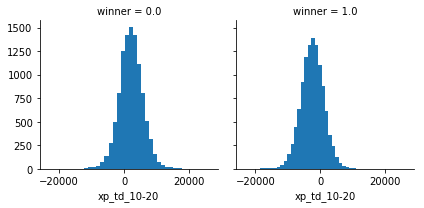

In [337]:
g = sns.FacetGrid(df, col='winner')
g.map(plt.hist, 'xp_td_10-20', bins=40)

In [338]:
def runModel(model, X_train, Y_train, X_test):
    """
    performs fitting of [model] using [X_train] and [Y_train]
    returns accuracy on training set, and predictions on [X_test]
    """
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = round(model.score(X_train, Y_train) * 100, 2)
    return accuracy, Y_pred

def runLogisticRegression(X_train, Y_train, X_test):
    """
    runs logistic regression
    returns accuracy on training set, and predictions
    """
    from sklearn.linear_model import LogisticRegression
    
    logreg = LogisticRegression()
    return runModel(logreg, X_train, Y_train, X_test)

def runSVM(X_train, Y_train, X_test):
    """
    runs support vector machine
    returns accuracy on training set, and predictions
    """
    from sklearn.svm import SVC
    
    svc = SVC()
    return runModel(svc, X_train, Y_train, X_test)

def runRandomForest(X_train, Y_train, X_test, n_estimators = 300):
    """
    runs random forest with [n_estimators] estimators
    returns accuracy on training set, and predictions
    """

    from sklearn.ensemble import RandomForestClassifier

    random_forest = RandomForestClassifier(n_estimators=300)
    return runModel(random_forest, X_train, Y_train, X_test)

In [350]:
from sklearn.model_selection import train_test_split
gold_X = (df['gold_t0_10-20'] + df['gold_t0_0-10']) / (df['gold_t1_10-20'] + df['gold_t1_0-10'])
gold_X0 = df['gold_t0_0-10'] / df['gold_t1_0-10']
gold_X1 = df['gold_t0_10-20'] / df['gold_t1_10-20']
#xp_X = (df['xp_t0_10-20'] + df['xp_t0_0-10']) / (df['xp_t1_10-20'] + df['xp_t1_0-10'])

# gold_X = (df['gold_t0_0-10']) / (df['gold_t1_0-10'])
# xp_X = (df['xp_t0_0-10']) / (df['xp_t1_0-10'])

# gold_absolute = df['gold_t0_0-10']
# xp_absolute = df['xp_t0_0-10']

n = len(df)
gold_X = gold_X.reshape((n,1))
gold_X0 = gold_X0.reshape((n,1))
gold_X1 = gold_X1.reshape((n,1))
xp_X = xp_X.reshape((n,1))
# gold_absolute = gold_absolute.reshape((n,1))
# xp_absolute = xp_absolute.reshape((n,1))
X = np.concatenate((gold_X, xp_X),axis=1)
#X = np.concatenate((gold_X0, gold_X1),axis=1)
# X = gold_X
# X = xp_X

X_train, X_test, y_train, y_test = train_test_split(X, df[['winner']], test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(df[['td_0-10']], df[['winner']], test_size=0.33, random_state=42)
acc, y_pred = runLogisticRegression(X_train, y_train, X_test)
print(acc)
print(accuracy_score(y_test, y_pred))

80.26
0.80215250744218


/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  
/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app
/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [344]:
from sklearn.metrics import accuracy_score

In [345]:
acc, y_pred = runSVM(X_train, y_train, X_test)
print(acc)
print(accuracy_score(y_test, y_pred)*100)

/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


80.22
80.26104877490268


In [318]:
acc, y_pred = runRandomForest(X_train, y_train, X_test)
print(acc)
print(accuracy_score(y_test, y_pred))

/Users/ccl/anaconda3/envs/test/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


100.0
0.8088426527958388
